# Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 


In [1]:
# Installing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Import dataset
df=pd.read_csv('E://EXCELR//Data science//Data science assignment//9) Association Rules//book.csv')
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
df.shape

(2000, 11)

In [4]:
# creating total of each bought item
s=df.sum()
s

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

<AxesSubplot:>

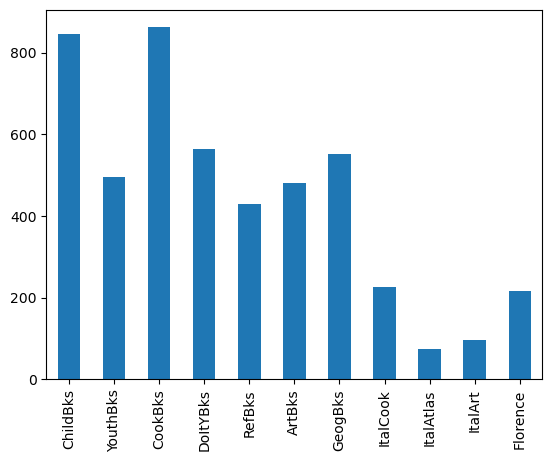

In [5]:
s.plot.bar()

# 1) Apriori algorithm with iterating support values and keeping min confidenece = 0.5

In [40]:
import warnings
warnings.filterwarnings("ignore")


In [41]:
min_support=[]
len_rules=[]
itemset=[]
i=0

for s in np.arange(0.01,0.420,0.010):
    frequent_item = apriori(df, min_support=s, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_support.append(s)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 41


In [8]:
d={'Minimum support':min_support,'Frequent itemsets':itemset,'Association rules number':len_rules}
sup_rules=pd.DataFrame(d)
sup_rules.head()

,Minimum support,Frequent itemsets,Association rules number
0,0.01,594,3272
1,0.02,276,1004
2,0.03,181,558
3,0.04,133,372
4,0.05,100,260


<AxesSubplot:xlabel='Minimum support', ylabel='Association rules number'>

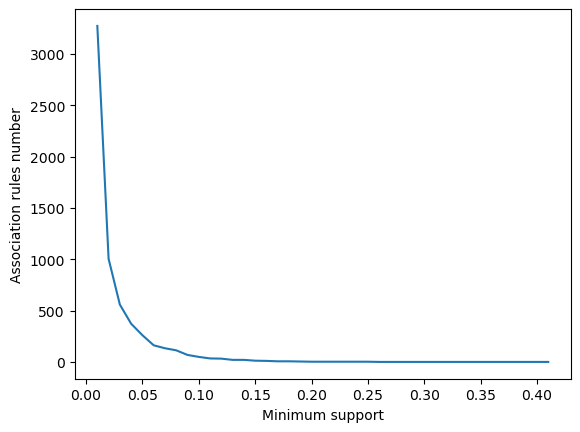

In [9]:
sns.lineplot(data=sup_rules, x='Minimum support',y='Association rules number')

The above plot shows that as minimum support value increases the number of association rules formed decreases.This is because with increase in support value,the number of frequent item sets generated decreases.Less number of frequent sets means less number of rules formed.



# 2) Apriori algorithm with iterating confidence values and minimum support = 0.01

In [42]:
min_conf=[]
len_rules=[]
itemset=[]
i=0

for t in np.arange(0.1,1.025,0.025):
    frequent_item = apriori(df, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=t)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_conf.append(t)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 37


In [11]:
c={'Minimum confidence':min_conf,'Frequent itemsets':itemset,'Association rules number':len_rules}
conf_rules=pd.DataFrame(c)
conf_rules.head()

,Minimum confidence,Frequent itemsets,Association rules number
0,0.100,594,9079
1,0.125,594,8420
2,0.150,594,7926
3,0.175,594,7528
4,0.200,594,7163


<AxesSubplot:xlabel='Minimum confidence', ylabel='Association rules number'>

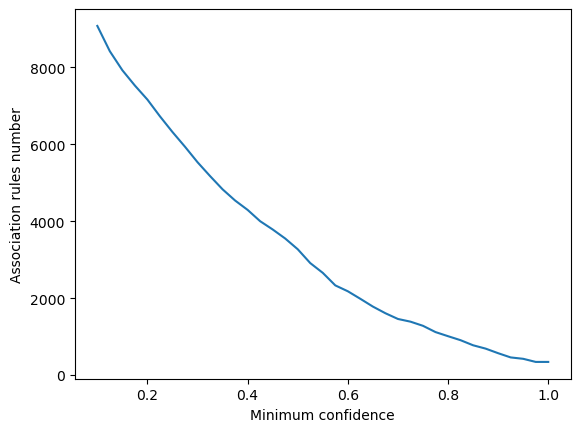

In [12]:
sns.lineplot(data=conf_rules, x='Minimum confidence', y='Association rules number')

The graph shows that as threshold of confidence is increased,the number of association rules get decreased.This is because with higher thresholds, fewer frequent itemsets are generated as few qualify for increased threshold values.



# Changing min length in aprioiri algorithm and observing the changes in association rules

In [43]:
k_itemset=[]
len_rules=[]
itemset=[]
i=0

for l in range(1,100):
    frequent_item = apriori(df, max_len=l,min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    k_itemset.append(l)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 99


In [14]:
a={'Length_itemset':k_itemset,'Frequent itemsets':itemset,'Association rules number':len_rules}
itemset_rules=pd.DataFrame(a)
itemset_rules.head()

,Length_itemset,Frequent itemsets,Association rules number
0,1,11,0
1,2,65,32
2,3,208,317
3,4,408,1167
4,5,547,2366


(0.0, 3435.6)

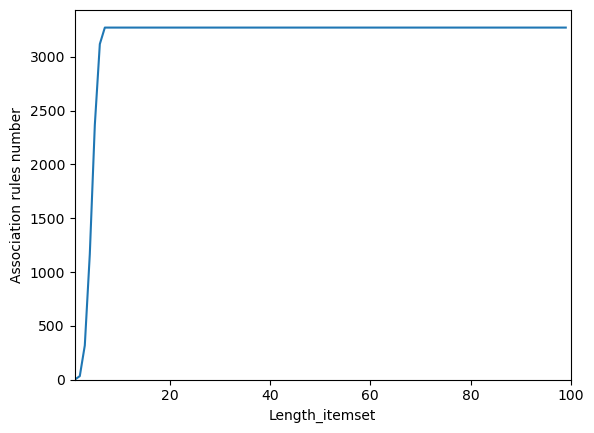

In [15]:
sns.lineplot(data=itemset_rules, x='Length_itemset', y='Association rules number')
plt.xlim(1,100)
plt.ylim(0,)

The graph shows that with increase in length of itemsets till 10, the number of association rules keep on increasing. Beyond length 10,the number of rules become constant.



# Association rules generation by running Apriori with min support = 0.01 and min confidence = 0.5

In [16]:
# generating frequent itemset
frequent_itemsets=apriori(df,min_support=0.01, use_colnames=True)
frequent_itemsets.head()

C:\Users\91771\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [17]:
print("Number of frequent itemsets generated with min support 0.01 is:",(frequent_itemsets.shape[0]))


Number of frequent itemsets generated with min support 0.01 is: 594


In [18]:
# adding a length column which stores the length of item sets generated
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [19]:
frequent_itemsets.head()

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1


In [20]:
# checking the number of frequent itemsets generated for each length
frequent_itemsets['length'].value_counts()

4    200
3    143
5    139
2     54
6     43
1     11
7      4
Name: length, dtype: int64

The maximum number of frequent itemsets generated are of length 4.



In [21]:
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
2,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
3,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
4,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
...,...,...,...,...,...,...,...,...,...,...
2174,"(ItalAtlas, CookBks, ArtBks)","(RefBks, ItalArt, ItalCook, ChildBks)",0.0140,0.0145,0.0110,0.785714,54.187192,0.010797,4.599000,0.995482
2175,"(ItalAtlas, ArtBks, ChildBks)","(RefBks, CookBks, ItalArt, ItalCook)",0.0155,0.0160,0.0110,0.709677,44.354839,0.010752,3.389333,0.992844
2176,"(ItalAtlas, ArtBks, ItalCook)","(RefBks, CookBks, ItalArt, ChildBks)",0.0130,0.0150,0.0110,0.846154,56.410256,0.010805,6.402500,0.995210
2177,"(ItalAtlas, ItalArt)","(RefBks, CookBks, ArtBks, ChildBks, ItalCook)",0.0165,0.0220,0.0110,0.666667,30.303030,0.010637,2.934000,0.983223


In [22]:
# checking statistical summary of rules generated
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000
mean,0.027498,0.223341,0.021013,0.794653,7.432924,0.013714,inf,0.737304
std,0.028906,0.142198,0.020536,0.131975,9.120928,0.009386,NaN,0.172216
min,0.010000,0.011500,0.010000,0.600000,1.404179,0.004155,1.441240,0.353544
25%,0.014500,0.113500,0.011500,0.666667,2.314815,0.008640,2.489375,0.577372
50%,0.018000,0.214500,0.014500,0.781250,4.149378,0.010752,3.519700,0.767442
75%,0.028500,0.423000,0.021000,0.904879,7.672540,0.014866,7.440000,0.888724
max,0.423000,0.431000,0.256000,1.000000,58.275058,0.078252,inf,0.999329


In [23]:
print('Total number of association rules generated: ',(rules.shape[0]))

Total number of association rules generated:  2179


# Visualization of Association Rules

# 1) Using scatter plot

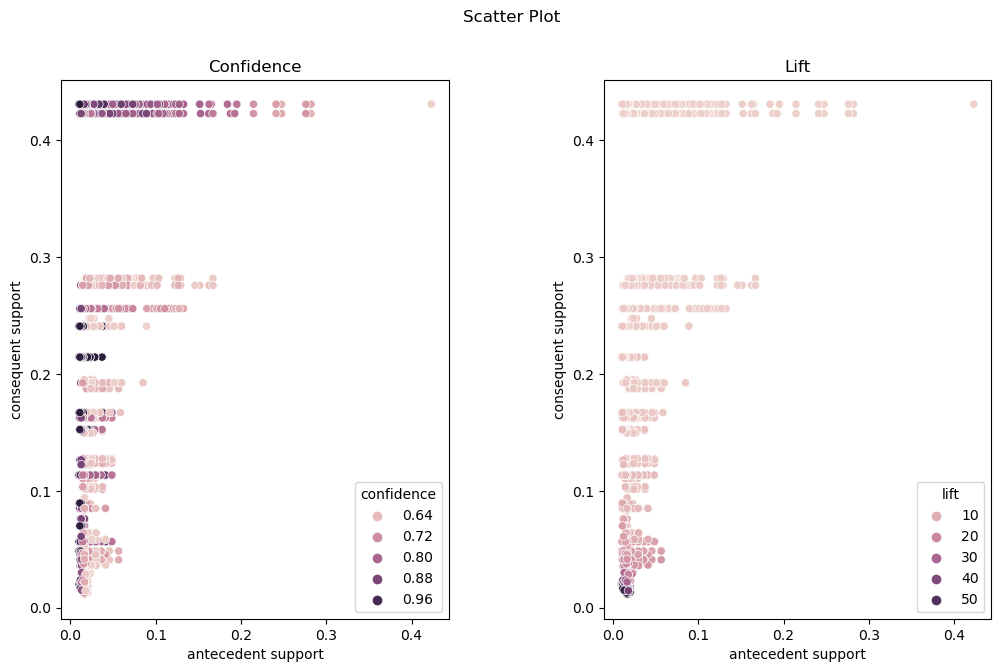

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12,7))
fig.suptitle('Scatter Plot')

sns.scatterplot(ax=axes[0],x='antecedent support',y='consequent support',hue='confidence',data=rules)
axes[0].set_title('Confidence')

sns.scatterplot(ax=axes[1],x='antecedent support',y='consequent support',hue='lift',data=rules)
axes[1].set_title('Lift')

plt.subplots_adjust(wspace=0.4)
plt.show()

# 2) Heatmap

In [25]:
rules_map=rules.copy()

In [26]:
# selecting rules with high confidence,lift and support
rules_map=rules_map.loc[(rules_map['lift']>10)& (rules_map['confidence']>0.70)& (rules_map['support']>0.02)]

In [27]:
rules_map.reset_index(drop=True,inplace=True)

In [28]:
# creating a subset of first 10 rules which will be plotted with heatmap
rules_10=rules_map.iloc[0:10,:]
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977,0.974174
1,"(ItalArt, ChildBks)","(ArtBks, ItalCook)",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800,0.963311
2,"(ItalAtlas, CookBks)","(RefBks, ItalCook)",0.0285,0.0465,0.0230,0.807018,17.355216,0.021675,4.940864,0.970026
3,"(CookBks, ItalArt)","(ArtBks, ItalCook)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429,0.978339
4,(ItalArt),"(CookBks, ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977,0.974174
5,"(ItalArt, DoItYBks)","(ArtBks, ItalCook)",0.0300,0.0565,0.0250,0.833333,14.749263,0.023305,5.661000,0.961031
6,"(GeogBks, ItalArt)","(ArtBks, ItalCook)",0.0295,0.0565,0.0240,0.813559,14.399280,0.022333,5.060591,0.958838
7,"(CookBks, ItalArt, ChildBks)","(ArtBks, ItalCook)",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000,0.969615
8,"(ItalArt, ChildBks)","(CookBks, ArtBks, ItalCook)",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800,0.963311
9,"(CookBks, ItalArt, DoItYBks)","(ArtBks, ItalCook)",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.737250,0.965036


In [29]:
# converting antecedents and consequent to string
rules_10['antecedents']=rules_10['antecedents'].apply(lambda a:','.join(list(a)))
rules_10['consequents']=rules_10['consequents'].apply(lambda a:','.join(list(a)))

C:\Users\91771\AppData\Local\Temp\ipykernel_12612\3290241837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_10['antecedents']=rules_10['antecedents'].apply(lambda a:','.join(list(a)))
C:\Users\91771\AppData\Local\Temp\ipykernel_12612\3290241837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_10['consequents']=rules_10['consequents'].apply(lambda a:','.join(list(a)))


In [30]:
print(rules_10[['antecedents','consequents']])

                antecedents              consequents
0                   ItalArt          ArtBks,ItalCook
1          ItalArt,ChildBks          ArtBks,ItalCook
2         ItalAtlas,CookBks          RefBks,ItalCook
3           CookBks,ItalArt          ArtBks,ItalCook
4                   ItalArt  CookBks,ArtBks,ItalCook
5          ItalArt,DoItYBks          ArtBks,ItalCook
6           GeogBks,ItalArt          ArtBks,ItalCook
7  CookBks,ItalArt,ChildBks          ArtBks,ItalCook
8          ItalArt,ChildBks  CookBks,ArtBks,ItalCook
9  CookBks,ItalArt,DoItYBks          ArtBks,ItalCook


In [31]:
# Constructing  pivot table
pvt_table1=rules_10.pivot(index='antecedents',columns='consequents',values='support')
pvt_table2=rules_10.pivot(index='antecedents',columns='consequents',values='confidence')
pvt_table3=rules_10.pivot(index='antecedents',columns='consequents',values='lift')

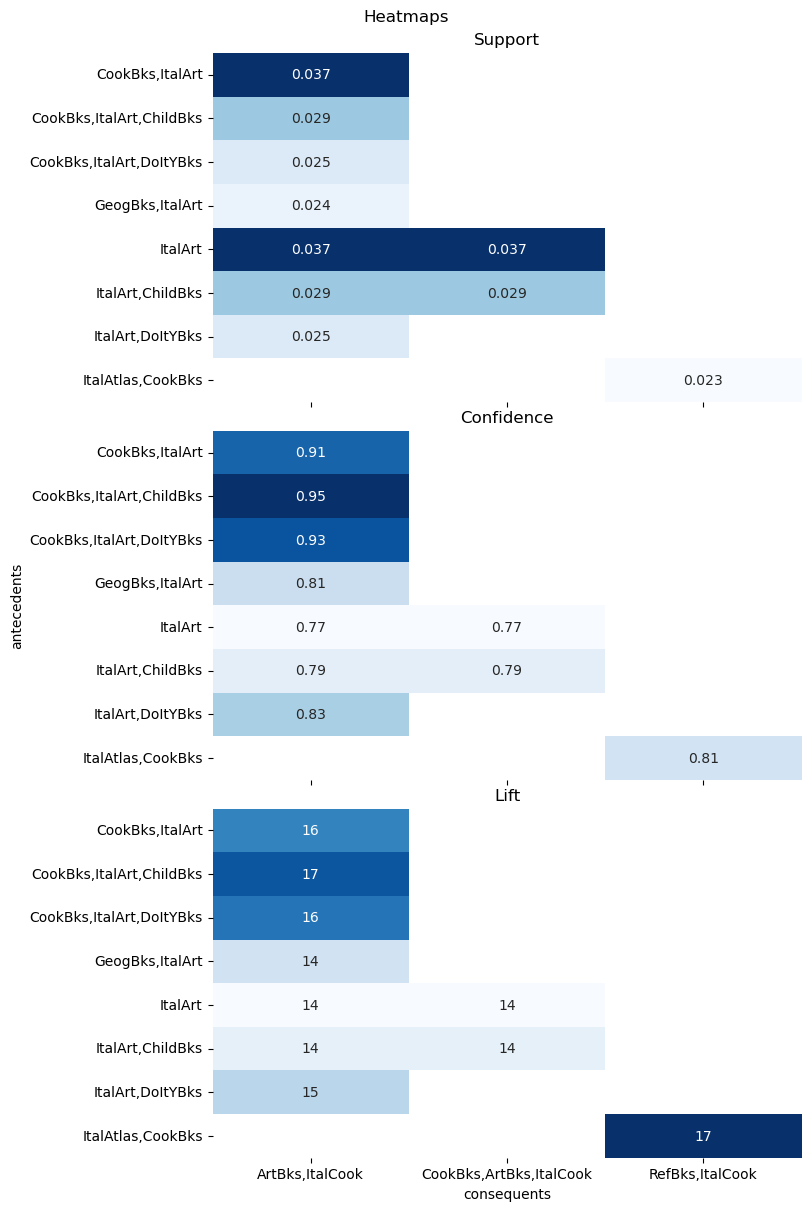

In [32]:
fig, axes = plt.subplots(3,1,sharex=True,constrained_layout = True,figsize=(8,12))
fig.suptitle('Heatmaps')

sns.heatmap(ax=axes[0],data=pvt_table1,annot=True,cbar=False,cmap='Blues')
axes[0].set_title('Support')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)

sns.heatmap(ax=axes[1],data=pvt_table2,annot=True,cbar=False,cmap='Blues')
axes[1].set_title('Confidence')
axes[1].set(xlabel=None)

sns.heatmap(ax=axes[2],data=pvt_table3,annot=True,cbar=False,cmap='Blues')
axes[2].set_title('Lift')
axes[2].set(ylabel=None)


plt.show()

# Parallel coordinate plots

In [33]:
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,ItalArt,"ArtBks,ItalCook",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977,0.974174
1,"ItalArt,ChildBks","ArtBks,ItalCook",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800,0.963311
2,"ItalAtlas,CookBks","RefBks,ItalCook",0.0285,0.0465,0.0230,0.807018,17.355216,0.021675,4.940864,0.970026
3,"CookBks,ItalArt","ArtBks,ItalCook",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429,0.978339
4,ItalArt,"CookBks,ArtBks,ItalCook",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977,0.974174
5,"ItalArt,DoItYBks","ArtBks,ItalCook",0.0300,0.0565,0.0250,0.833333,14.749263,0.023305,5.661000,0.961031
6,"GeogBks,ItalArt","ArtBks,ItalCook",0.0295,0.0565,0.0240,0.813559,14.399280,0.022333,5.060591,0.958838
7,"CookBks,ItalArt,ChildBks","ArtBks,ItalCook",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000,0.969615
8,"ItalArt,ChildBks","CookBks,ArtBks,ItalCook",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800,0.963311
9,"CookBks,ItalArt,DoItYBks","ArtBks,ItalCook",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.737250,0.965036


In [37]:
# creating a column called 'rule no' to store rule numbers
rules_10['rule no']=np.arange(1,11)
data=rules_10.iloc[:,[0,1,10]]
data

C:\Users\91771\AppData\Local\Temp\ipykernel_12612\360956016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_10['rule no']=np.arange(1,11)


,antecedents,consequents,rule no
0,ItalArt,"ArtBks,ItalCook",1
1,"ItalArt,ChildBks","ArtBks,ItalCook",2
2,"ItalAtlas,CookBks","RefBks,ItalCook",3
3,"CookBks,ItalArt","ArtBks,ItalCook",4
4,ItalArt,"CookBks,ArtBks,ItalCook",5
5,"ItalArt,DoItYBks","ArtBks,ItalCook",6
6,"GeogBks,ItalArt","ArtBks,ItalCook",7
7,"CookBks,ItalArt,ChildBks","ArtBks,ItalCook",8
8,"ItalArt,ChildBks","CookBks,ArtBks,ItalCook",9
9,"CookBks,ItalArt,DoItYBks","ArtBks,ItalCook",10


<AxesSubplot:>

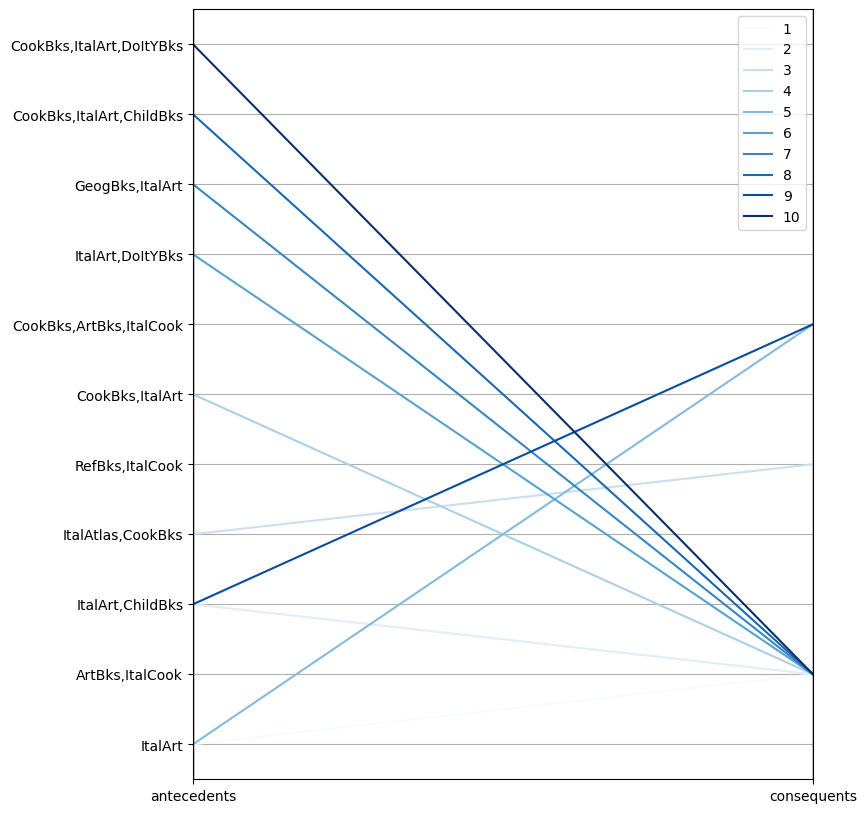

In [39]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(8,10))
parallel_coordinates(data,'rule no',colormap='Blues')

In [38]:
for col in rules_10.columns:
    print(col)

antecedents
consequents
antecedent support
consequent support
support
confidence
lift
leverage
conviction
zhangs_metric
rule no


In above plot,the line represents association rules.It shows rules formed between each antecedent and consequent pair.Absence of lines imply no rules were formed for that antecedent--> consequent pair.

The plot gives only an idea of association rules present or absent for antecedent-->consequent pair.No information about metrics such as lift or support are provided by parallel coordinates plot.

The graph shows association present between (ItalArt)-->(ItalCook,CookBks,ArtBks),(ItalArt,ChildBks)-->(ItalCook,ArtBks)etc.

We can see no association rule found for these pairs:(ItalCook,Artbks)-->(ItalArt,ChildBks),(ItalArt,ChildBks)-->(ItalAtlas,CookBks)etc.
